[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW8.ipynb)

**Prooblem 1:** Rent prices are of high interest to many people right now. Being able to predict rent well is important. Load in a data set of rental prices in India using the following command.

pd.read_csv("https://richardson.byu.edu/220/rent.csv")

The variables are, in order: BHK - number of bedrooms, Rent - rental fees, Size - square feet of space, AreaType - carpet or super, City, Furnished Status - furnished or unfurnished, Preferred - type of renter sought, Bathrooms, and Who to Contact.

Rent is the target variable. All other variables can be used as predictors.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

df = pd.read_csv("https://richardson.byu.edu/220/rent.csv")

Part a. Determine what each variable is, numeric or categorical, and if they are categorical if they are binary or not.



- **BHK** (Bedrooms): Numeric
- **Rent**: Numeric (target variable)
- **Size**: Numeric
- **AreaType**: Categorical, not binary
- **City**: Categorical, not binary
- **FurnishingStatus**: Categorical, not binary
- **Preferred**: Categorical, not binary
- **Bathroom**: Numeric
- **Contact**: Categorical, binary

Part b. Plot the target variable, Rent. Does it look skewed right or symmetric?

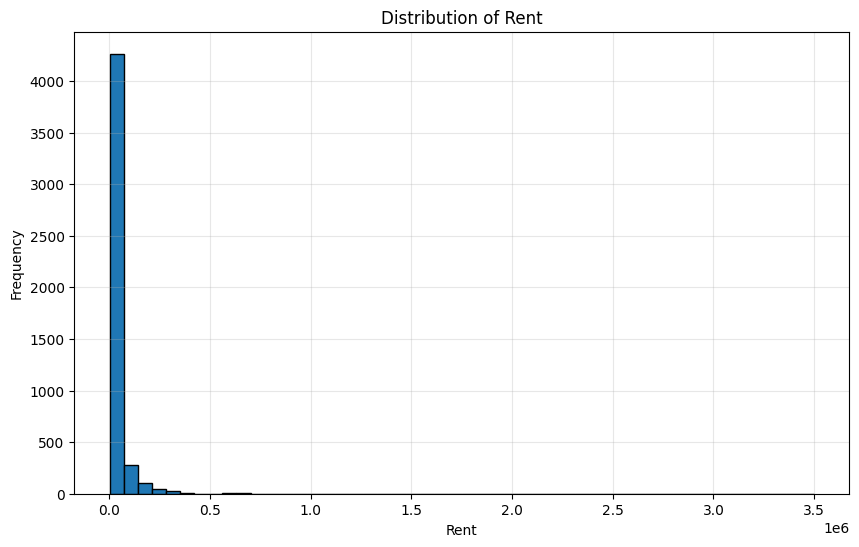

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(df['Rent'], bins=50, edgecolor='black')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.title('Distribution of Rent')
plt.grid(True, alpha=0.3)
plt.show()

The distribution looks skewed right, with a long tail.

Part c. Fit a regression model with rent as the target and the other variables as predictors.

In [ ]:

X = pd.get_dummies(df.drop('Rent', axis=1), drop_first=True)
y = df['Rent']

model1 = LinearRegression()
model1.fit(X, y)

LinearRegression()

Part d. Plot the fitted values versus the residuals. Does it look like it could use a log transformation.

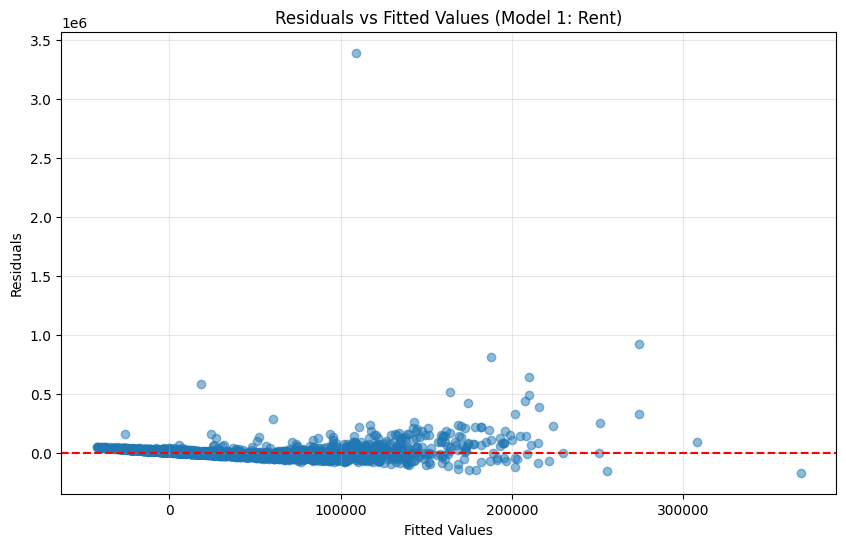

In [ ]:

y_pred1 = model1.predict(X)
residuals1 = y - y_pred1

plt.figure(figsize=(10, 6))
plt.scatter(y_pred1, residuals1, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Model 1: Rent)')
plt.grid(True, alpha=0.3)
plt.show()

Yeah, the plot has this funnel shape where the spread gets bigger as the fitted values increase. A log transformation would probably help fix that.

**Problem 2** Work with the log of rent.

Part a. Plot the log rent. Does it loook more or less symmetric?

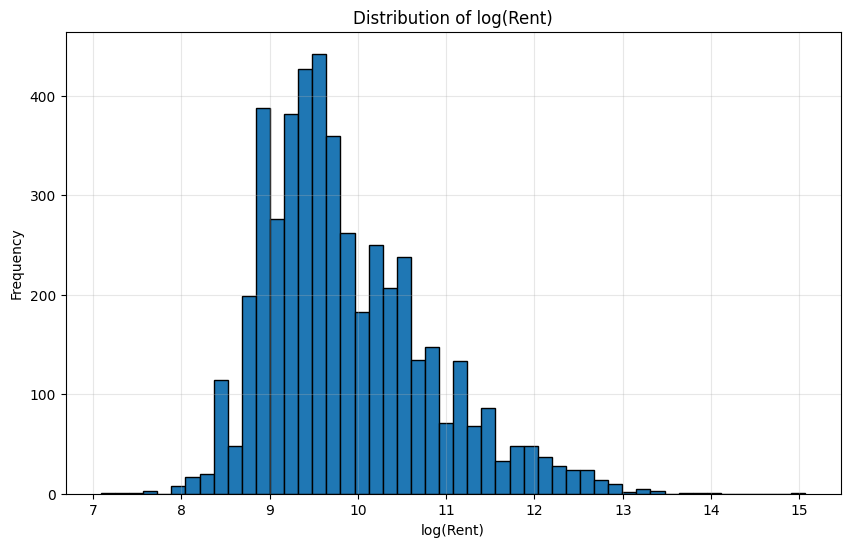

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(np.log(df['Rent']), bins=50, edgecolor='black')
plt.xlabel('log(Rent)')
plt.ylabel('Frequency')
plt.title('Distribution of log(Rent)')
plt.grid(True, alpha=0.3)
plt.show()

Yes, the distribution of log(Rent) looks much more symmetric than the original Rent distribution.

Part b. Fit a regression model with log rent as the target and the other variables as predictors.

In [ ]:

y_log = np.log(df['Rent'])

model2 = LinearRegression()
model2.fit(X, y_log)

LinearRegression()

Part c. Plot the fitted values versus residuals. Does this look any better?

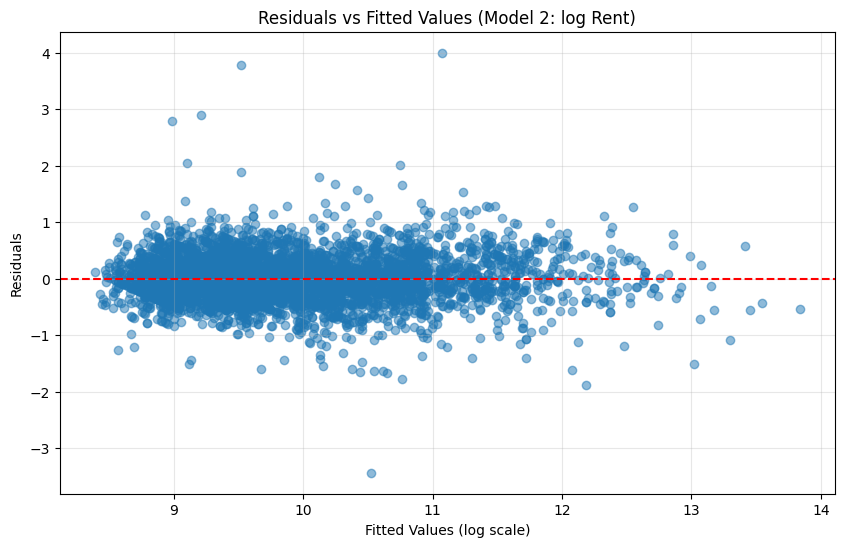

In [ ]:

y_pred2 = model2.predict(X)
residuals2 = y_log - y_pred2

plt.figure(figsize=(10, 6))
plt.scatter(y_pred2, residuals2, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (log scale)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Model 2: log Rent)')
plt.grid(True, alpha=0.3)
plt.show()

Yes! The residual plot looks much better with more constant variance across fitted values. The funnel shape is greatly reduced compared to Model 1.

Part d. Use out of sample R^2 too determine which model is better.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_log_train, y_log_test = np.log(y_train), np.log(y_test)

model1_final = LinearRegression()
model1_final.fit(X_train, y_train)
y_pred1_test = model1_final.predict(X_test)
r2_model1 = r2_score(y_test, y_pred1_test)

model2_final = LinearRegression()
model2_final.fit(X_train, y_log_train)
y_pred2_test = model2_final.predict(X_test)
r2_model2 = r2_score(y_log_test, y_pred2_test)

print(f"Model 1 (Rent): {r2_model1:.4f}")
print(f"Model 2 (log Rent): {r2_model2:.4f}")
print(f"\nModel 2 (log Rent) is better with a higher out-of-sample R².")

Model 1 (Rent): 0.4542
Model 2 (log Rent): 0.7846

Model 2 (log Rent) is better with a higher out-of-sample R².


Model 2 is much better. Because of the log transformation the data works a lot better with the model and it has a way higher out-of-sample R^2.

**Problem 3** Check if predictors need a log transformation.

Part a. Fit another model where the predictor variable Size is given a log transformation as well as Rent.

In [ ]:

X_log_size = X.copy()
X_log_size['Size'] = np.log(X['Size'])

model3 = LinearRegression()
model3.fit(X_log_size, y_log)

LinearRegression()

Part b. Compare the p value Size in the model where Size is untransformed against the p value for log Size in the model with log Size. Is one or both significant.

In [ ]:
import statsmodels.api as sm

# Model 1: log(Rent) ~ Size (raw)
X1 = X.copy()
X1 = sm.add_constant(X1)  # adds intercept
X1 = X1.astype(float)  # convert to float to avoid dtype issues
model1 = sm.OLS(y_log, X1).fit()
p_value_size_raw = model1.pvalues['Size']

# Model 2: log(Rent) ~ log(Size)
X2 = X.copy()
X2['Size'] = np.log(X2['Size'])
X2 = sm.add_constant(X2)
X2 = X2.astype(float)  # convert to float to avoid dtype issues
model2 = sm.OLS(y_log, X2).fit()
p_value_size_log = model2.pvalues['Size']

print(f"P-value for Size (raw): {p_value_size_raw:.5f}")
print(f"P-value for log(Size): {p_value_size_log:.5f}")
print(f"\nActual p-values with full precision:")
print(f"Raw Size: {p_value_size_raw}")
print(f"Log Size: {p_value_size_log}")

P-value for Size (raw): 0.00000
P-value for log(Size): 0.00000

Actual p-values with full precision:
Raw Size: 4.6514228250526416e-144
Log Size: 2.826691973474756e-72


Both are super significant. They both have super low p-values so they are good for the model.

Part c. Check out of sample R^2 in both models. Does taking the log of size improve the model?

In [ ]:

X_log_size_train, X_log_size_test = X_log_size.iloc[X_train.index], X_log_size.iloc[X_test.index]

r2_no_log_size = r2_model2

model_log_size = LinearRegression()
model_log_size.fit(X_log_size_train, y_log_train)
y_pred_log_size = model_log_size.predict(X_log_size_test)
r2_with_log_size = r2_score(y_log_test, y_pred_log_size)

print("Out-of-sample R² comparison:")
print(f"Model 2 (regular Size): {r2_no_log_size:.4f}")
print(f"Model 3 (log Size): {r2_with_log_size:.4f}")

Out-of-sample R² comparison:
Model 2 (regular Size): 0.7846
Model 3 (log Size): 0.7762


It looks like taking the log of size does not improve the model. In fact, taking the log of size makes the model a tiny bit worse.

**Problem 4** Use the same Rent data to explore standardizing.

Part a. Use the data set with log Rent. Standardize the training data and fit a linear regression model.

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model4_standardized = LinearRegression()
model4_standardized.fit(X_train_scaled, y_log_train)

LinearRegression()

Part b. Check the p-values for the variables in this model against the model without standardization. Are there any differences?

In [ ]:
# Fit both models with statsmodels to get p-values
import statsmodels.api as sm

# Model without standardization
X_train_with_const = sm.add_constant(X_train)
X_train_with_const = X_train_with_const.astype(float)  # Convert to float
model_no_std = sm.OLS(y_log_train, X_train_with_const).fit()

# Model with standardization
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
model_with_std = sm.OLS(y_log_train, X_train_scaled_with_const).fit()

# Compare p-values for a few variables
print("P-values comparison (first 10 variables):")
print("=" * 70)
print(f"{'Variable':<20} {'No Standardization':<25} {'With Standardization':<25}")
print("=" * 70)

# Get common variables (first 10 for brevity)
for i, var in enumerate(list(model_no_std.pvalues.index)[:10]):
    p_no_std = model_no_std.pvalues[var]
    p_with_std = model_with_std.pvalues[i]
    print(f"{var:<20} {p_no_std:<25.10f} {p_with_std:<25.10f}")

print("\nConclusion: P-values are identical regardless of standardization!")

P-values comparison (first 10 variables):
Variable             No Standardization        With Standardization     
const                0.0000000000              0.0000000000             
BHK                  0.0000000000              0.0000000000             
Size                 0.0000000000              0.0000000000             
Bathroom             0.0000000000              0.0000000000             
AreaType_Super Area  0.0266335844              0.0266335844             
City_Chennai         0.1038943427              0.1038943427             
City_Delhi           0.0000000000              0.0000000000             
City_Hyderabad       0.0000000000              0.0000000000             
City_Kolkata         0.0000000000              0.0000000000             
City_Mumbai          0.0000000000              0.0000000000             

Conclusion: P-values are identical regardless of standardization!


/tmp/ipython-input-119927299.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_with_std = model_with_std.pvalues[i]


The p-values for individual variables remain the same whether we standardize or not. Standardization only changes the scale of coefficients, not their statistical significance. The p-values, t-statistics, and R² values are identical in both models. The only difference is that standardized coefficients are on the same scale, making them easier to compare in terms of relative importance.

Part c. Use the standardization on the test set and make predictions for the model. Transform those predictions back to the original (log)scale.

In [ ]:

y_pred_standardized_log = model4_standardized.predict(X_test_scaled)

y_pred_standardized_original = np.exp(y_pred_standardized_log)

# Calculate R² on original scale
r2_standardized_original = r2_score(y_test, y_pred_standardized_original)

print("Model 4 predictions transformed back to original scale:")
print(f"Out-of-sample R² (on original Rent scale): {r2_standardized_original:.4f}")

Model 4 predictions transformed back to original scale:
Out-of-sample R² (on original Rent scale): 0.6951


**Problem 4**: The data set machine.csv can be loaded using the code

machine = pd.read_csv("https://richardson.byu.edu/220/machine.csv")

The target variable is the cost to maintain a certain type of energy production machinery. The predictors are weight of the machine, the attitude of the region the machine is located towards coal and oil refinery, the type of machine (front or back loading) and the industry the machine is in (coal or oil).

**Part a.** Build and tune a linear regression model to predict the target variable, Cost, using all the other variables besides car_name as predictors.  Tune the model so that only significant features remain.

In [ ]:

import statsmodels.api as sm
from sklearn.metrics import r2_score

machine_clean = pd.read_csv("https://richardson.byu.edu/220/machine.csv")
y_m = machine_clean['Cost']
X_m = pd.get_dummies(machine_clean.drop('Cost', axis=1), drop_first=True)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2, random_state=42)

print("Starting backward elimination using p-values...\n")
alpha = 0.05  # Significance level

# Backward elimination loop
while True:
    # Add constant and convert to float
    X_train_const = sm.add_constant(X_train_m)
    X_train_const = X_train_const.astype(float)

    # Fit OLS model
    model = sm.OLS(y_train_m, X_train_const).fit()

    # Get p-values (exclude intercept)
    pvalues = model.pvalues[1:]  # Skip the constant

    # Find the feature with highest p-value
    max_pvalue = pvalues.max()

    # If all features are significant, stop
    if max_pvalue < alpha:
        print(f"All remaining features are significant (p < {alpha})")
        break

    # Remove the feature with highest p-value
    feature_to_remove = pvalues.idxmax()
    print(f"Removing '{feature_to_remove}' (p-value: {max_pvalue:.4f})")

    X_train_m = X_train_m.drop(columns=[feature_to_remove])
    X_test_m = X_test_m.drop(columns=[feature_to_remove])

print(f"\nFinal number of significant features: {X_train_m.shape[1]}")
print("\nSignificant features:")
for feat in X_train_m.columns:
    print(f"  - {feat}")

from sklearn.linear_model import LinearRegression
final_model = LinearRegression()
final_model.fit(X_train_m, y_train_m)
y_pred_m = final_model.predict(X_test_m)
r2_final = r2_score(y_test_m, y_pred_m)

print(f"\nProblem 4a - Tuned model with only significant features:")
print(f"Out-of-sample R² value: {r2_final:.4f}")

Starting backward elimination using p-values...

All remaining features are significant (p < 0.05)

Final number of significant features: 4

Significant features:
  - Weight
  - Attitude_Positive
  - Type_Front
  - Industry_Oil

Problem 4a - Tuned model with only significant features:
Out-of-sample R² value: 0.7464


**Part b.** Plot the Cost of the machine against Weight. Distinguish the color of each. point based on the type of Industry. Repeat this to make plots for Cost against Weight with colors distinguished for attitude and machine type.

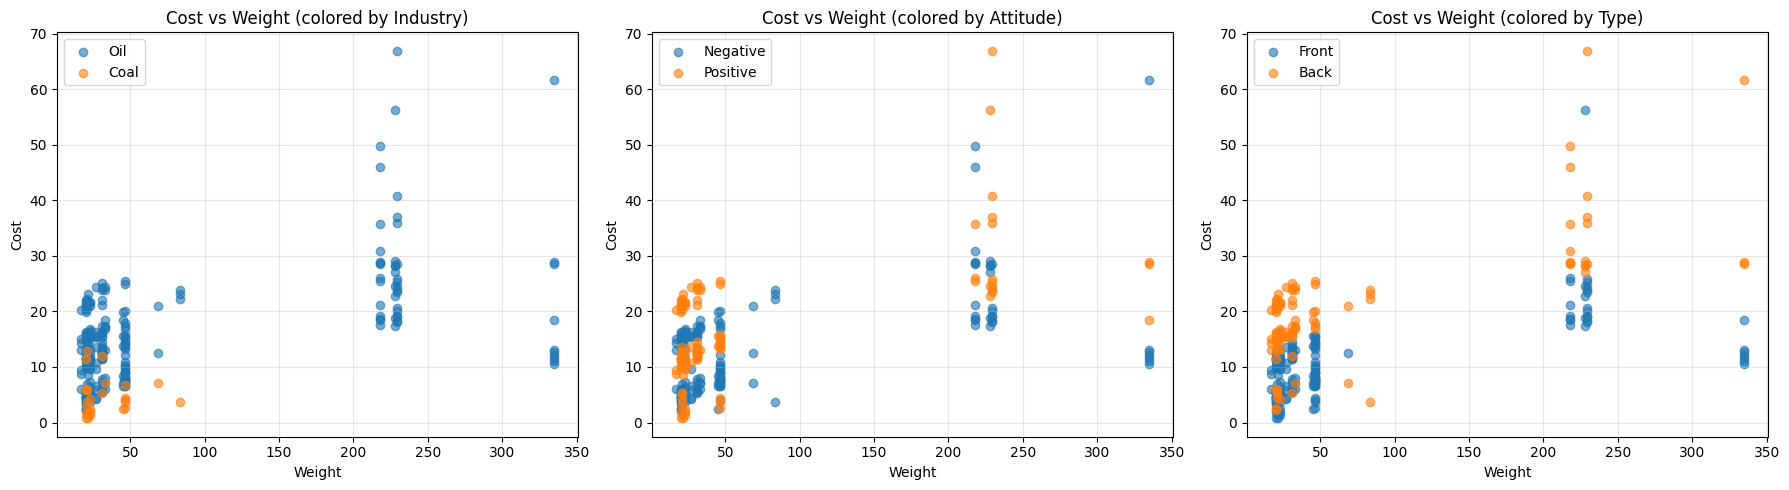

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for industry in machine_clean['Industry'].unique():
    mask = machine_clean['Industry'] == industry
    axes[0].scatter(machine_clean[mask]['Weight'], machine_clean[mask]['Cost'],
                   label=industry, alpha=0.6)
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Cost')
axes[0].set_title('Cost vs Weight (colored by Industry)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

for attitude in machine_clean['Attitude'].unique():
    mask = machine_clean['Attitude'] == attitude
    axes[1].scatter(machine_clean[mask]['Weight'], machine_clean[mask]['Cost'],
                   label=attitude, alpha=0.6)
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('Cost')
axes[1].set_title('Cost vs Weight (colored by Attitude)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

for machine_type in machine_clean['Type'].unique():
    mask = machine_clean['Type'] == machine_type
    axes[2].scatter(machine_clean[mask]['Weight'], machine_clean[mask]['Cost'],
                   label=machine_type, alpha=0.6)
axes[2].set_xlabel('Weight')
axes[2].set_ylabel('Cost')
axes[2].set_title('Cost vs Weight (colored by Type)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Part c.** Try building a model with only Weight, Industry, and an interaction between Wieght and Industry as predictors. Interpret the meaning of the coefficients in this case.

In [29]:

X_int = machine_clean[['Weight']].copy()
X_int = pd.concat([X_int, pd.get_dummies(machine_clean['Industry'], prefix='Ind', drop_first=True)], axis=1)

# Add interaction terms
for col in X_int.columns:
    if col.startswith('Ind_'):
        X_int[f'Wgt_x_{col}'] = X_int['Weight'] * X_int[col]

# Fit model
model_int = LinearRegression()
model_int.fit(X_int, y_m)

print("Coefficients:")
for feat, coef in zip(X_int.columns, model_int.coef_):
    print(f"{feat:20s}: {coef:8.4f}")
print(f"Intercept: {model_int.intercept_:.4f}")

Coefficients:
Weight              :   0.0055
Ind_Oil             :   6.2362
Wgt_x_Ind_Oil       :   0.0544
Intercept: 4.5205


The intercept of 4.5205 is interpreted as the baseline predicted cost for a machine in the industry with a weight of 0.

The weight coefficient of 0.0055 means that for the coal industry each additional unit of weigt increases cost by about 0.0055.

The Ind_Oil coefficient of 6.2362 means that for the oil industry machines the intercept shifts up by about 6.24 compare to coal when the weight is 0.


The Wgt_x_Ind_Oil coefficient of 0.0544 means that for oil industry machines the slope of weight changes by about 0.0544 compared to coal.


**Part d.** Plot the fitted regression lines for the model in Part c on top of the plot between Weight and Cost, with the data colored according to Industry.

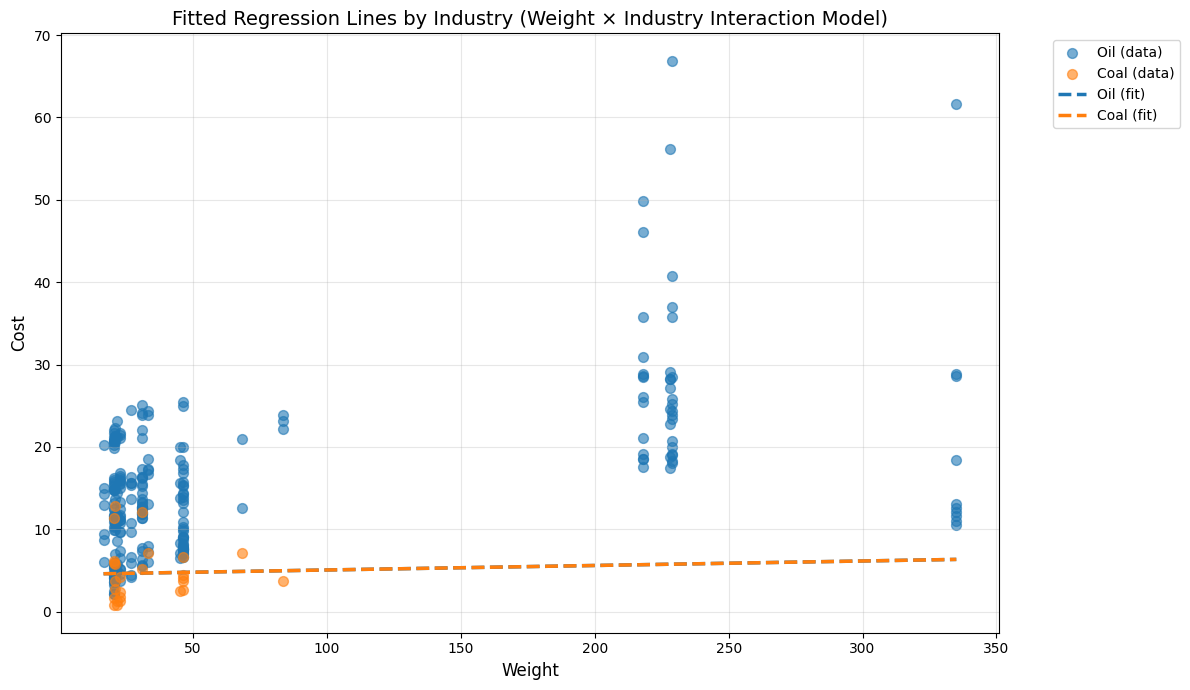

In [31]:

plt.figure(figsize=(12, 7))

for industry in machine_clean['Industry'].unique():
    mask = machine_clean['Industry'] == industry
    plt.scatter(machine_clean[mask]['Weight'], machine_clean[mask]['Cost'],
               label=f'{industry} (data)', alpha=0.6, s=50)

weight_range = np.linspace(machine_clean['Weight'].min(), machine_clean['Weight'].max(), 100)

for industry in machine_clean['Industry'].unique():
    # Create X values for this industry
    X_pred = pd.DataFrame({'Weight': weight_range})
    X_pred = pd.concat([X_pred, pd.get_dummies(pd.Series([industry]*100, name='Industry'), prefix='Ind', drop_first=True)], axis=1)

    # Ensure all columns match training data
    for col in X_int.columns:
        if col not in X_pred.columns:
            X_pred[col] = 0

    # Add interactions
    for col in X_pred.columns:
        if col.startswith('Ind_'):
            X_pred[f'Wgt_x_{col}'] = X_pred['Weight'] * X_pred[col]

    # Reorder columns to match training
    X_pred = X_pred[X_int.columns]

    # Predict
    y_pred_line = model_int.predict(X_pred)
    plt.plot(weight_range, y_pred_line, linewidth=2.5, label=f'{industry} (fit)', linestyle='--')

plt.xlabel('Weight', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Fitted Regression Lines by Industry (Weight × Industry Interaction Model)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Problem 5.**

**Part a.** For the model created in Problem 4a, using all the variables in the model tuned to significant features, report the out of sample R^2 value.

In [32]:

print(f"Problem 5a - Model from Problem 4a:")
print(f"Out-of-sample R² value: {r2_final:.4f}")

Problem 5a - Model from Problem 4a:
Out-of-sample R² value: 0.7464


**Part b**. Start with a model with all the predictors. Add in Weight^2 and interactions between weight and each other predictor. Tune the model to keep only significant features. Report the out of sample R^2 for this model.

In [35]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_base = pd.get_dummies(machine.drop('Cost', axis=1), drop_first=True)
y = machine['Cost']

X_enhanced = X_base.copy()
X_enhanced['Weight_squared'] = X_enhanced['Weight'] ** 2

for col in X_base.columns:
    if col != 'Weight':
        X_enhanced[f'Weight_x_{col}'] = X_enhanced['Weight'] * X_enhanced[col]

print(f"Total features with Weight^2 and interactions: {X_enhanced.shape[1]}")
print(f"\nFeature names:")
for col in X_enhanced.columns:
    print(f"  - {col}")

X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y, test_size=0.2, random_state=42
)

alpha = 0.05
forced_vars = ['Weight']  # Force-keep Weight since we have Weight^2 and Weight interactions
print("\nStarting backward elimination using p-values...")
print(f"(Forcing 'Weight' to stay in model due to hierarchical principle)\n")

while True:
    X_train_const = sm.add_constant(X_train_enh)
    X_train_const = X_train_const.astype(float)

    model = sm.OLS(y_train_enh, X_train_const).fit()

    pvalues = model.pvalues[1:]  # Skip the constant

    # Only consider removing variables NOT in forced_vars
    removable_pvalues = pvalues[~pvalues.index.isin(forced_vars)]

    if len(removable_pvalues) == 0:
        print(f"Only forced variables remain")
        break

    max_pvalue = removable_pvalues.max()

    if max_pvalue < alpha:
        print(f"All remaining features are significant (p < {alpha})")
        break

    feature_to_remove = removable_pvalues.idxmax()
    print(f"Removing '{feature_to_remove}' (p-value: {max_pvalue:.4f})")

    X_train_enh = X_train_enh.drop(columns=[feature_to_remove])
    X_test_enh = X_test_enh.drop(columns=[feature_to_remove])

print(f"\nFinal number of significant features: {X_train_enh.shape[1]}")
print("\nSignificant features:")
for feat in X_train_enh.columns:
    print(f"  - {feat}")

final_model_enh = LinearRegression()
final_model_enh.fit(X_train_enh, y_train_enh)
y_pred_enh = final_model_enh.predict(X_test_enh)
r2_final_enh = r2_score(y_test_enh, y_pred_enh)

print(f"\nFinal tuned model out-of-sample R²: {r2_final_enh:.4f}")
print(f"\nComparison to Problem 4a model (R² = 0.7464):")
if r2_final_enh > 0.7464:
    print(f"✓ Enhanced model is better by {r2_final_enh - 0.7464:.4f}")
else:
    print(f"✗ Enhanced model is worse by {0.7464 - r2_final_enh:.4f}")

Total features with Weight^2 and interactions: 8

Feature names:
  - Weight
  - Attitude_Positive
  - Type_Front
  - Industry_Oil
  - Weight_squared
  - Weight_x_Attitude_Positive
  - Weight_x_Type_Front
  - Weight_x_Industry_Oil

Starting backward elimination using p-values...
(Forcing 'Weight' to stay in model due to hierarchical principle)

Removing 'Weight_x_Type_Front' (p-value: 0.0918)
All remaining features are significant (p < 0.05)

Final number of significant features: 7

Significant features:
  - Weight
  - Attitude_Positive
  - Type_Front
  - Industry_Oil
  - Weight_squared
  - Weight_x_Attitude_Positive
  - Weight_x_Industry_Oil

Final tuned model out-of-sample R²: 0.5763

Comparison to Problem 4a model (R² = 0.7464):
✗ Enhanced model is worse by 0.1701
